In [2]:
import pandas as pd
import numpy as np

# Generate random sample data
np.random.seed(42)
n_samples = 1000  # Adjust for more data

data = {
    "CreditScore": np.random.randint(400, 900, n_samples),
    "Geography": np.random.choice(["France", "Spain", "Germany"], n_samples),
    "Gender": np.random.choice(["Male", "Female"], n_samples),
    "Age": np.random.randint(18, 80, n_samples),
    "Tenure": np.random.randint(0, 10, n_samples),
    "Balance": np.random.uniform(0, 250000, n_samples).round(2),
    "NumOfProducts": np.random.randint(1, 5, n_samples),
    "HasCrCard": np.random.randint(0, 2, n_samples),
    "IsActiveMember": np.random.randint(0, 2, n_samples),
    "EstimatedSalary": np.random.uniform(20000, 200000, n_samples).round(2),
    "Exited": np.random.randint(0, 2, n_samples)
}



In [5]:
df = pd.DataFrame(data)

In [6]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,502,France,Male,18,0,181764.19,3,1,1,159991.02,1
1,835,Germany,Male,28,7,140518.20,3,1,1,174498.13,0
2,748,France,Male,20,6,236772.67,4,1,0,172075.54,0
3,670,Spain,Female,69,6,124064.69,2,0,1,84741.60,1
4,506,Germany,Male,79,2,95129.43,4,0,0,143702.18,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      1000 non-null   int64  
 1   Geography        1000 non-null   object 
 2   Gender           1000 non-null   object 
 3   Age              1000 non-null   int64  
 4   Tenure           1000 non-null   int64  
 5   Balance          1000 non-null   float64
 6   NumOfProducts    1000 non-null   int64  
 7   HasCrCard        1000 non-null   int64  
 8   IsActiveMember   1000 non-null   int64  
 9   EstimatedSalary  1000 non-null   float64
 10  Exited           1000 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 86.1+ KB


In [8]:
df['Geography'].value_counts()


Geography
France     341
Germany    331
Spain      328
Name: count, dtype: int64

In [11]:
df['Gender'].value_counts()

Gender
Female    518
Male      482
Name: count, dtype: int64

In [12]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)


In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,502,18,0,181764.19,3,1,1,159991.02,1,False,False,True
1,835,28,7,140518.20,3,1,1,174498.13,0,True,False,True
2,748,20,6,236772.67,4,1,0,172075.54,0,False,False,True
3,670,69,6,124064.69,2,0,1,84741.60,1,False,True,False
4,506,79,2,95129.43,4,0,0,143702.18,0,True,False,True


In [14]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

array([-0.6446284 , -0.75748089, -1.56664442, -1.16221771, -0.51136457,
        1.03563452, -1.06994024, -1.50619303, -0.70379479,  1.40892676,
       -0.96801137])

In [21]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [66]:
model = Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [67]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])


In [69]:
history = model.fit(X_train_trf,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5028 - loss: 0.7078 - val_accuracy: 0.4875 - val_loss: 0.6988
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4744 - loss: 0.7144 - val_accuracy: 0.4875 - val_loss: 0.6959
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4652 - loss: 0.7077 - val_accuracy: 0.4875 - val_loss: 0.6955
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5290 - loss: 0.6988 - val_accuracy: 0.4938 - val_loss: 0.6954
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4651 - loss: 0.7028 - val_accuracy: 0.4875 - val_loss: 0.6955
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4952 - loss: 0.6959 - val_accuracy: 0.4875 - val_loss: 0.6951
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5176 - loss: 0.6949 - val_accuracy: 0.4938 - val_loss: 0.6951
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5185 - loss: 0.6912 - val_accuracy: 0.4938 - 

In [52]:
y_pred = model.predict(X_test_trf)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step


In [53]:
# len(y_pred)
# y_pred[:10]
y_pred = np.where(y_pred > 0.5,1,0)

In [57]:
y_pred[:15]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.5

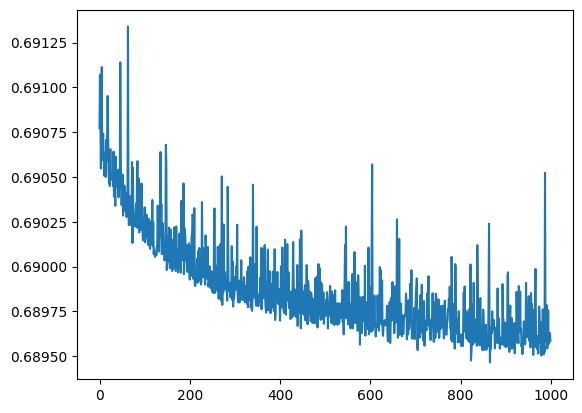

In [60]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])